Dataset used: https://www.kaggle.com/datasets/shiivvvaam/most-watched-movies-and-tv-shows

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
cd Datasets/

[WinError 2] The system cannot find the file specified: 'Datasets/'
c:\Users\stomp\Documents\CODE Lancashire\Py-DataScience\Datasets


c:\Users\stomp\Documents\CODE Lancashire\Py-DataScience\.venv\Lib\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


Loading the data

In [6]:

tv_df = pd.read_csv('flixpatrol.csv', sep =',')

Identifying keys

In [8]:
tv_df.keys()

Index(['Rank', 'Title', 'Type', 'Premiere', 'Genre', 'Watchtime',
       'Watchtime in Million'],
      dtype='object')

Identifying Genres and other info

In [9]:
Genre = tv_df['Genre'].unique()


array(['Action', 'Drama', 'Thriller', 'Fantasy', 'Crime', 'Reality-Show',
       'Comedy', 'History', 'Superhero', 'Animation', 'Science Fiction',
       'Horror', 'Adventure', 'Documentary', 'War', 'Musical', nan,
       'Romance', 'Family', 'Stand-Up', 'Western', 'Sports', 'Biography',
       'Talk Show', 'Game-Show', 'Broadcast', 'Concerts', 'News',
       'Fairy Tale'], dtype=object)

In [10]:
#Number of genres
len(tv_df['Genre'].unique())

29

In [13]:
tv_df['Premiere'].unique()

array([2023., 2021., 2022., 2018., 2011., 2020., 2012., 2013., 2010.,
       2016., 2003., 2019., 2008., 2017., 2000., 2004., 2015., 2014.,
       2009., 1996., 2005., 1994., 2007., 2001., 1989., 1997., 2006.,
       2002., 1993.,   nan, 1999., 1995., 1972., 1983., 1978., 1998.,
       1974., 1986., 1988., 1991., 1976., 1985., 1987., 1992., 1977.,
       1990., 1979., 1973., 1982., 1966., 1984., 1980., 1975., 1940.,
       1963., 1970., 1981., 1964., 1960., 1971., 1968., 1969., 1962.,
       1954., 1961., 1953., 1957., 1956., 1958., 1965., 1951., 1955.,
       1967., 1952.])

In [15]:
tv_df['Type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [29]:
len(tv_df[tv_df['Type'] == 'TV Show'])

7284

In [18]:
len(tv_df[tv_df['Type'] == 'Movie'])

10880

What is the distribution of TV shows to movies?

Text(0.5, 1.0, 'Distribution of media type: Movies vs TV Shows')

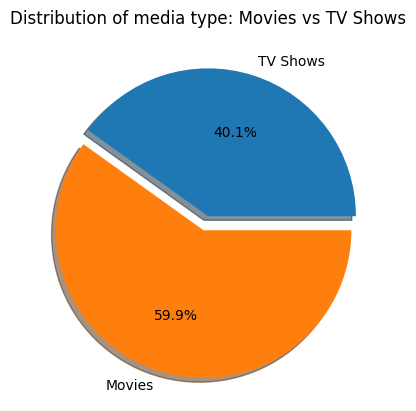

In [46]:
labels = 'TV Shows', 'Movies'
sizes = [len(tv_df[tv_df['Type'] == 'TV Show']),len(tv_df[tv_df['Type'] == 'Movie'])]
explode =( 0, 0.1)
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, shadow=True,labels=labels,  autopct='%1.1f%%')

plt.title('Distribution of media type: Movies vs TV Shows')

Breaking down the genres overall.

In [35]:
genre_counts = tv_df['Genre'].value_counts()

In [42]:
total_genres = genre_counts.sum()
genre_percentages = (genre_counts / total_genres) * 100

In [43]:
# Separate values less than 3% into 'Others'
counts_filtered = genre_counts[genre_percentages >= 3]
others_count = genre_counts[genre_percentages < 3].sum()

# Add 'Others' to the counts if any value is less than 3%
if others_count > 0:
    counts_filtered['Others'] = others_count

Text(0.5, 1.0, 'TV Show & Movie genres in database')

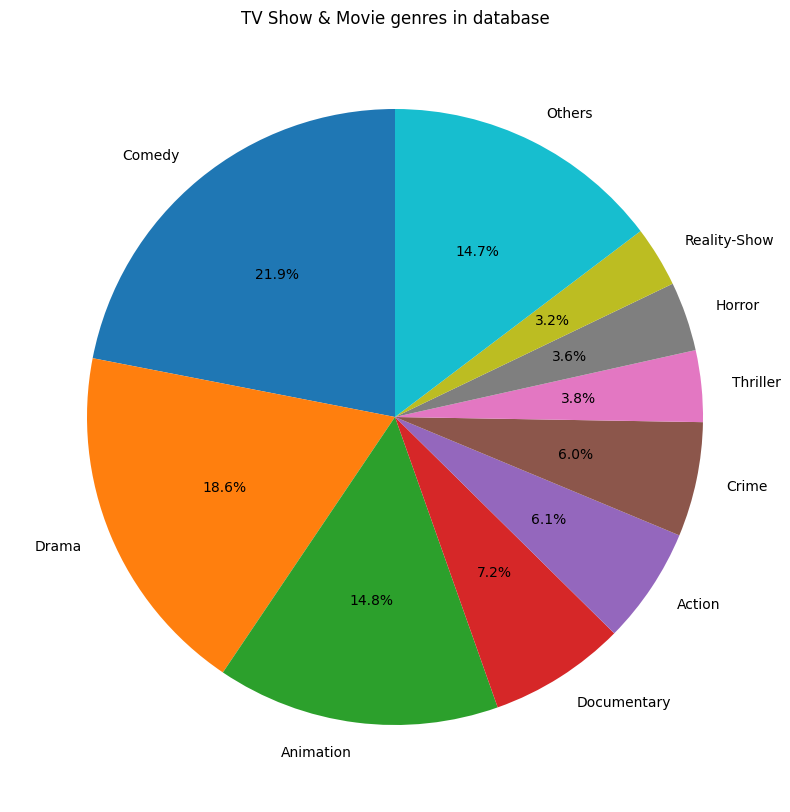

In [45]:
# Create a pie chart
plt.figure(figsize=(10,10))  # Set the figure size
plt.pie(counts_filtered, labels= counts_filtered.index, autopct='%1.1f%%', startangle=90)

plt.title('TV Show & Movie genres in database')

In [61]:
genre_counts_tv = pd.crosstab(tv_df['Genre'],tv_df['Type'])

print(genre_counts_tv)

Type             Movie  TV Show
Genre                          
Action             983      117
Adventure          277        4
Animation          747     1923
Biography          198        1
Broadcast            0       22
Comedy            2713     1233
Concerts            20        0
Crime              523      558
Documentary        705      589
Drama             1929     1420
Fairy Tale          12        0
Family              44       28
Fantasy            153      150
Game-Show            0        9
History             57       97
Horror             574       80
Musical             40        0
News                 0        1
Reality-Show         1      573
Romance            512        7
Science Fiction    266      132
Sports              17        0
Stand-Up           224        0
Superhero           66       77
Talk Show            0       82
Thriller           581       94
War                 85        5
Western             53        2


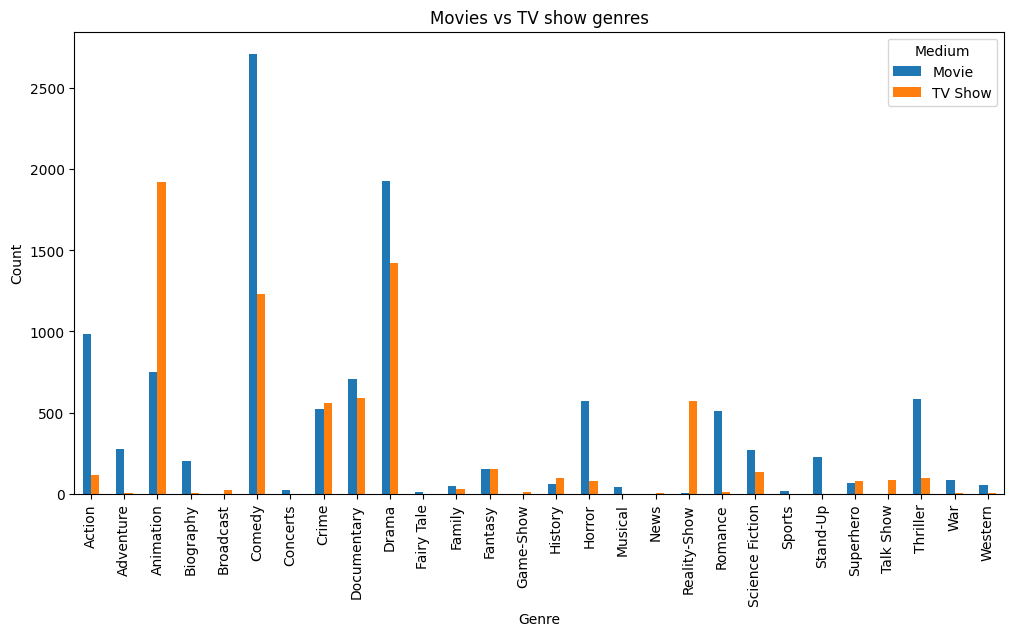

In [55]:
genre_counts_tv.plot(kind='bar', figsize=(12, 6))
plt.title('Movies vs TV show genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.legend(title='Medium')

# Show the plot
plt.show()